## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Имеется два набора данных:
 - Набор mkrf_movies содержит в себе данные о фильме, выданном прокатном удостоверении, дате релиза и объем государственной поддержки, выделенной на картину;
 - Набор mkrf_shows содержит информацию о прокате фильмов в российских кинотеатрах.
 
Все данные взяты с портала открытых данных Министерства культуры. Необходимо изучить рынок российского кинопроката, выявить закономерности и текцщие тренды. Особое внимание уделяется фильмам, получившим государственную поддержку.

### Откроем файлы с данными и объединим их в один датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
try:
    movies_data = pd.read_csv('datasets/mkrf_movies.csv')
    shows_data = pd.read_csv('datasets/mkrf_shows.csv')
except:
    movies_data = pd.read_csv('https://*********/mkrf_movies.csv')
    shows_data = pd.read_csv('https://**********/mkrf_shows.csv')

display(movies_data.head(10))
display(shows_data.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


Проверим тип данных колонок 'puNumber' в обоих датасетах методом .info()
Заменим тип в таблице с object на int64 с учетом контроля ошибок

In [3]:

try:
    movies_data['puNumber']=movies_data['puNumber'].astype('int64')
except:
    movies_data = movies_data.loc[movies_data['puNumber'].str.isdigit()]
    movies_data['puNumber']=movies_data['puNumber'].astype('int64')

# movies_data['puNumber'].info()



In [4]:
merged_mov_data = movies_data.merge(shows_data, on='puNumber', how='left')
display(merged_mov_data.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [5]:
print(movies_data.shape)
print(shows_data.shape)
print(merged_mov_data.shape)

(7484, 15)
(3158, 2)
(7484, 16)


После проверки можем наблюдать, что все значения таблицы фильмов остались, в них интегрировались значения проката (количество столбцов стало больше, по одному столбцу произошло совмещение, а второй добавился в полученный датафрейм)

### Предобработка данных

In [6]:
merged_mov_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int64  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Заменим:
 - 'show_start_date' в datetime
 - 'rating' в float
 - 'puNumber' в int64 заменили выше, во время слияния двух таблиц

In [7]:
merged_mov_data["show_start_date"] = merged_mov_data['show_start_date'].astype('datetime64[D]')

In [8]:
merged_mov_data['ratings'] = merged_mov_data['ratings'].replace('\%', '',regex=True)
merged_mov_data['ratings'] = merged_mov_data['ratings'].astype(float)
merged_mov_data.loc[merged_mov_data['ratings'] > 10, 'ratings'] = merged_mov_data['ratings'] / 10
display(merged_mov_data.head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Преобразуем рейтинг ожидания (указан в процентах) в обычный формат рейтинга.

In [9]:
merged_mov_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7484 non-null   object        
 1   puNumber               7484 non-null   int64         
 2   show_start_date        7484 non-null   datetime64[ns]
 3   type                   7484 non-null   object        
 4   film_studio            7466 non-null   object        
 5   production_country     7482 non-null   object        
 6   director               7475 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7484 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Посмотрим количество пропусков в процентах на тепловой карте по столбцам

In [10]:
pd.DataFrame(round(merged_mov_data.isna().mean()*100,2)).style.background_gradient('BrBG_r')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.580000
age_restriction,0.000000
refundable_support,95.560000


Изучив данную таблицу и проверив данные можем придти к выводам:
 - Пропуски в колонках film_studio, production_country, director, producer заполнить данными крайне трудно, заполним значением 'не указан'
 - Пропуски в столбцах ..support, budget, financing_source не будем заполнять, так как фильмов с господдержкой не так много, а соответственно остальные фильмы не получали господдержки
 - Пропуски в столбце ratings оставим, потому что заполнение их медианным значением испортит достоверность данных (пропусков значительное количество)
 - Пропуски в genres заполним значением 'не указан'
 - Пропуски в box_office оставим такими как есть

In [11]:
for i in ['genres', 'director', 'producer', 'production_country', 'film_studio']:
    merged_mov_data[i] = merged_mov_data[i].fillna('не указан')

#### Изучим дубликаты в датафрейме

In [12]:
merged_mov_data['title'].duplicated().sum()

714

Явных дубликатов в данном наборе 714, возможно это различные прокатные удостоверения на одни и те же фильмы, найдем неявные.
Можно найти много неявных дубликатов в колонках с текстовыми значениями, они возникают из-за разных транскрипций английских названий и других похожих факторов, но в данном случае это не очень важно.
Проверим дубликаты в колонках title и puNumber, именно с их помощью мы отличаем фильмы.

In [13]:
len(merged_mov_data)
merged_mov_data['puNumber'].nunique()
merged_mov_data['puNumber']=merged_mov_data['puNumber'].drop_duplicates().reset_index(drop=True)

In [14]:
merged_mov_data['title'] = merged_mov_data['title'].str.strip('_')
merged_mov_data['title'] = merged_mov_data['title'].str.strip('.')
merged_mov_data['title'] = merged_mov_data['title'].str.strip('-')
merged_mov_data['title'] = merged_mov_data['title'].str.strip()
merged_mov_data['title'].value_counts()

День святого Валентина                          5
Волшебная страна                                5
Непокоренный                                    4
Красавчик-2                                     4
Дом грёз                                        4
                                               ..
Рыба моя                                        1
С 5 до 7. Время любовников                      1
Как поймать монстра                             1
Второй шанс                                     1
Машины песенки. Серия "Когда цветут кактусы"    1
Name: title, Length: 6673, dtype: int64

In [15]:
replace_dict = [
    '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
    '2 + 2',
    '300 спартанцев /По роману-комиксу Фрэнка Миллера и Линн Варли/',
    '300 спартанцев: Расцвет империи /По произведению Фрэнка Миллера "Ксеркс"/',
    '300 спартанцев: Расцвет империи /По произведению Фрэнка Миллера "Ксеркс"/ (на английском языке)',
    'Агент Джонни Инглиш 2: Перезагрузка',
    'Алиса в стране чудес /По одноименному произведению Льюиса Кэрола/',
    'Астрал. Глава вторая',
    'Атлантида: затерянный мир',
    'Беглецы -',
    'Блэйд. Троица',
    'Большая игра / Big Game',
    'Вероника решает умереть (2009)',
    'Викинг 18+',
    'Выхода нет (2015)',
    '',

]
fine_dict = [
    'Тихоокеанский рубеж',
    '2+2',
    '300 спартанцев',
    '300 спартанцев',
    '300 спартанцев (на английском языке)',
    'Агент Джонни Инглиш: Перезагрузка',
    'Алиса в стране чудес /По книгам Льюиса Кэрролла "Алиса в стране чудес" и "Алиса в Зазеркалье"/',
    'Астрал. Глава 2',
    'Атлантида: Затерянный мир',
    'Беглецы',
    'Блэйд: Троица',
    'Большая игра',
    'Вероника решает умереть',
    'Викинг',
    'Выхода нет',
    '',

]
merged_mov_data = merged_mov_data.replace(replace_dict, fine_dict)

In [16]:
merged_mov_data['title_lower'] = merged_mov_data['title'].str.lower()

С помощью удаления лишних символов в начале и конце названий, точечных замен и приведению названий в нижний регистр добились сокращения большинства дубликатов, оставшиеся представляют собой единичные случае и не влияют на дальнейшее исследование

#### Изучим категориальные значения

In [17]:
merged_mov_data['type'].str.strip()
merged_mov_data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

#### Проверим количественные значения

In [18]:
merged_mov_data['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

В описании данных видим, что минимальное значение равно нулю, по описанию данных такого быть не может, дополнительно проверим эти строки:

In [19]:
merged_mov_data.loc[merged_mov_data['refundable_support'] + merged_mov_data['nonrefundable_support'] >= merged_mov_data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_lower
2051,14+,111023614.0,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,14+
2056,Дуxless 2,111000415.0,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,дуxless 2
2470,Воин (2015),111017315.0,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,воин (2015)
2530,Бармен,111009615.0,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,бармен
2613,Савва. Сердце воина,114001715.0,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,савва. сердце воина
2682,Тряпичный союз,111010215.0,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,тряпичный союз
2786,Срочно выйду замуж,111017115.0,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,срочно выйду замуж
2872,Помню - не помню!,111004916.0,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,помню - не помню!
3045,Любовь с ограничениями,111008216.0,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,любовь с ограничениями
3563,Притяжение (2016),111018116.0,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,притяжение (2016)


В строках есть господдержка, но нет общего бюджета, так не может быть, строки удалим

In [20]:
merged_mov_data = merged_mov_data.loc[~(merged_mov_data['refundable_support'] + merged_mov_data['nonrefundable_support'] >= merged_mov_data['budget'])]

count    3.150000e+02
mean     1.340961e+08
std      1.912260e+08
min      1.446246e+07
25%      4.615387e+07
50%      7.337955e+07
75%      1.500043e+08
max      2.305074e+09
Name: budget, dtype: float64

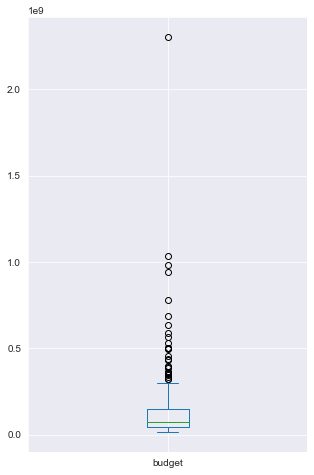

In [21]:
display(merged_mov_data['budget'].describe())
merged_mov_data['budget'].plot(kind='box' ,grid=True, figsize = (5, 8));

In [22]:
merged_mov_data['budget'] = merged_mov_data.loc[(merged_mov_data['budget'] <= 0.4*10**9) & (merged_mov_data['budget'] >= 0.2*10**8),'budget']

count    3.141000e+03
mean     7.600967e+07
std      2.402503e+08
min      0.000000e+00
25%      8.395000e+04
50%      2.284862e+06
75%      2.344112e+07
max      3.073569e+09
Name: box_office, dtype: float64

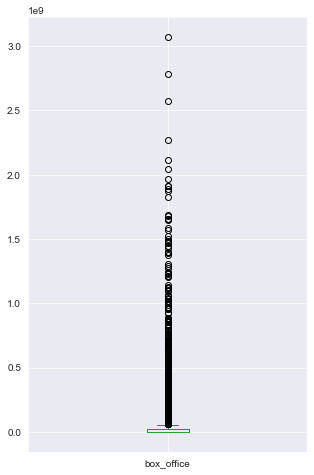

In [23]:
display(merged_mov_data['box_office'].describe())
merged_mov_data['box_office'].plot(kind='box' ,grid=True, figsize = (5, 8));

In [24]:
merged_mov_data['box_office'] = merged_mov_data.loc[(merged_mov_data['box_office'] <= 0.6*10**9) & (merged_mov_data['box_office'] >= 6.7*10**4),'box_office']

In [25]:
print(f'Удалено данных: {round(100-merged_mov_data.shape[0] / movies_data.shape[0] * 100,2)}%')

Удалено данных: 0.23%


#### Добавим новые столбцы

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [26]:
merged_mov_data['show_start_year'] = merged_mov_data['show_start_date'].dt.year
merged_mov_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_lower,show_start_year
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,открытый простор,2015
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не указан,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,особо важное задание,2016
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2015


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [27]:
def gen_first_item(item):
    return item.split(',',1)[0]


merged_mov_data['general_director'] = merged_mov_data.apply(lambda x: gen_first_item(x['director']), axis=1)
merged_mov_data['general_genre'] = merged_mov_data.apply(lambda x: gen_first_item(x['genres']), axis=1)

merged_mov_data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,title_lower,show_start_year,general_director,general_genre
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,открытый простор,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не указан,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,особо важное задание,2016,Е.Матвеев,драма
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Сад художника: Американский импрессионизм,124010819.0,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,не указан,NaN,сад художника: американский импрессионизм,2019,Фил Грабски,не указан
7480,Звериная ярость,124010619.0,2019-12-24,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,звериная ярость,2019,Ник Пауэлл,боевик
7481,Щенячий патруль: Скорей спешим на помощь!,124010719.0,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN,щенячий патруль: скорей спешим на помощь!,2019,Чарльз Е.Бастьен,не указан
7482,"Машины песенки. Серия ""Испанские мотивы""",NaN,2019-12-30,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,не указан,NaN,"машины песенки. серия ""испанские мотивы""",2019,А.Беляев,не указан


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [28]:
merged_mov_data['gov_support'] = round((merged_mov_data['refundable_support'] + merged_mov_data['nonrefundable_support'])/merged_mov_data['budget'] ,2)

merged_mov_data.loc[merged_mov_data['gov_support'].notna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,title_lower,show_start_year,general_director,general_genre,gov_support
1280,Пока еще жива,111005313.0,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,пока еще жива,2013,А.Атанесян,драма,0.33
1447,Бесславные придурки,111003314.0,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,не указан,NaN,бесславные придурки,2014,А.Якимчук,не указан,0.70
1497,Невидимки,111004213.0,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,невидимки,2013,Р.Давлетьяров,комедия,0.61
1523,БЕРЦЫ,111004314.0,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,NaN,берцы,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1791,Братья Ч,111004414.0,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,232100.0,братья ч,2014,М.Угаров,драма,0.62


In [29]:
# display(merged_mov_data)

### Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год.

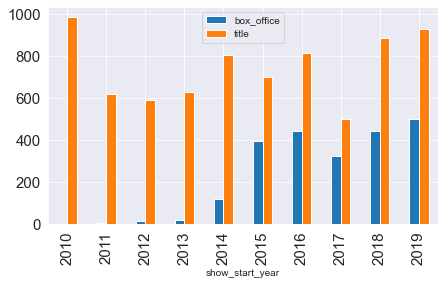

In [30]:
pd.pivot_table(merged_mov_data, values=('title', 'box_office'), index='show_start_year', aggfunc='count').plot(kind='bar', figsize=(7, 4), fontsize=15);

In [31]:
i = pd.pivot_table(merged_mov_data, values=('title', 'box_office'), index='show_start_year', aggfunc='count') #ревьюеру: используем переменную i, чтобы не плодить лишние переменные, не нашел способа как это сделать по другому))
i['part'] = round(i['box_office']/i['title'],3)
display(i)

,box_office,title,part
show_start_year,,,
2010,3,985,0.003
2011,8,622,0.013
2012,14,592,0.024
2013,20,630,0.032
2014,118,805,0.147
2015,394,699,0.564
2016,446,815,0.547
2017,324,503,0.644
2018,443,887,0.499


Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной.

In [32]:
merged_mov_data.groupby('show_start_year')['box_office'].sum()

show_start_year
2010    1.860441e+06
2011    1.333028e+07
2012    5.853808e+06
2013    2.858943e+07
2014    4.483087e+09
2015    2.206094e+10
2016    2.253652e+10
2017    1.881076e+10
2018    2.346007e+10
2019    2.179149e+10
Name: box_office, dtype: float64

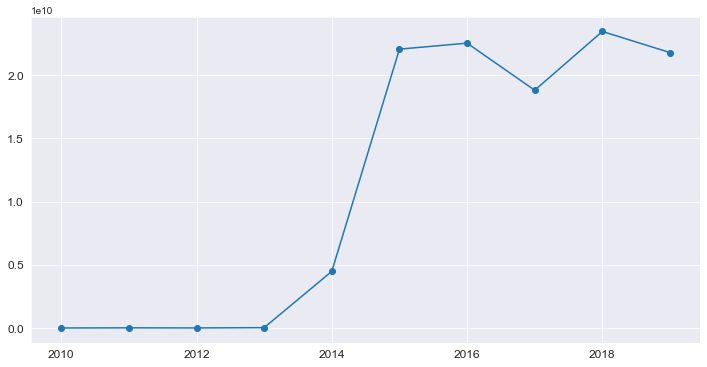

In [33]:
(merged_mov_data.groupby('show_start_year')['box_office']
 .sum()
 .plot(
    style='o-',
    y='mean' ,
    grid=True,
    figsize=(12, 6),
    ylabel='',
    xlabel='',
    fontsize = 12)
);

Анализируя график и сводную таблицу выше, можем сделать вывод:
Самые большие сборы были в 2018 году, а самые низкие сборы - в 2010
Полнее всего в данных представлены 2018-2019 года.

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [34]:
pd.pivot_table(merged_mov_data, values='box_office', index='show_start_year', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
show_start_year,,
2010,6.201470e+05,245630.00
2011,1.666285e+06,100107.50
2012,4.181291e+05,214278.00
2013,1.429471e+06,142907.75
2014,3.799226e+07,838900.50
2015,5.599224e+07,6772856.25
2016,5.053031e+07,4793164.25
2017,5.805790e+07,8214761.00


Видим, что в 2010-2013 годах были рекордно низкие сборы, возможно это связано с тем, что кинотеатры не передавали данные о всех продажах в то время.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

In [35]:
merged_mov_data['cut_age_restriction'] = merged_mov_data['age_restriction'].str.split('»').str[0].str.strip('«')
display(merged_mov_data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,title_lower,show_start_year,general_director,general_genre,gov_support,cut_age_restriction
0,Открытый простор,221048915.0,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,7.2,"боевик,драма,мелодрама",NaN,открытый простор,2015,Кевин Костнер,боевик,NaN,18+
1,Особо важное задание,111013716.0,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не указан,«6+» - для детей старше 6 лет,NaN,...,NaN,6.6,"драма,военный",NaN,особо важное задание,2016,Е.Матвеев,драма,NaN,6+
2,Особо опасен,221038416.0,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016,Тимур Бекмамбетов,фантастика,NaN,18+
3,Особо опасен,221026916.0,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2016,Тимур Бекмамбетов,фантастика,NaN,18+
4,Особо опасен,221030815.0,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,особо опасен,2015,Тимур Бекмамбетов,фантастика,NaN,18+


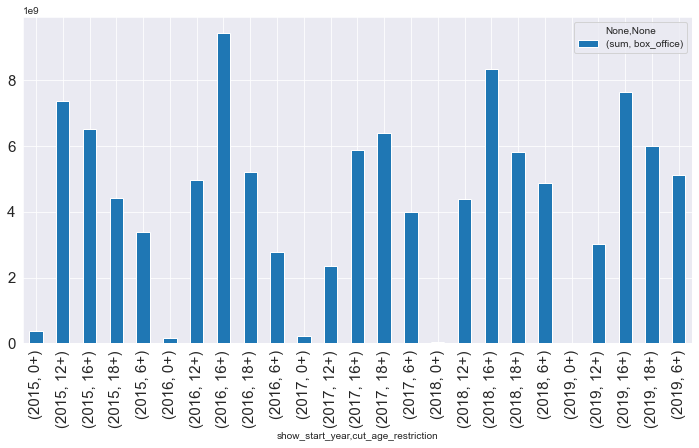

In [36]:

(merged_mov_data
 .loc[merged_mov_data['show_start_year'] >= 2015]
 .pivot_table
    (
    values='box_office',
    index=['show_start_year',
           'cut_age_restriction'],
    aggfunc=['sum']
    )
 .plot(kind='bar', figsize=(12, 6), fontsize=15)
);

Анализируем график и видим, что возрастное ограничение действительно влияет на кассовые сборы.
Чаще всего смотрят фильмы 12+ и 16+, скорее всего картина меняется год от года, потому что выходит больше или меньше различных фильмов с близкими возрастными ограничениями. Чуть реже смотрят фильмы 6+, еще реже фильмы только для взрослых (18+). Фильмы без возрастных ограничений (0+) из года в год смотрят реже всего.

### Исследуем фильмы, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [37]:
gov_support_films = merged_mov_data.loc[merged_mov_data['budget'].notna()]

Посмотрим, сколько выделяют средств на поддержку кино, каких средств больше, возвратных или невозвратных, а также долю господдержки.


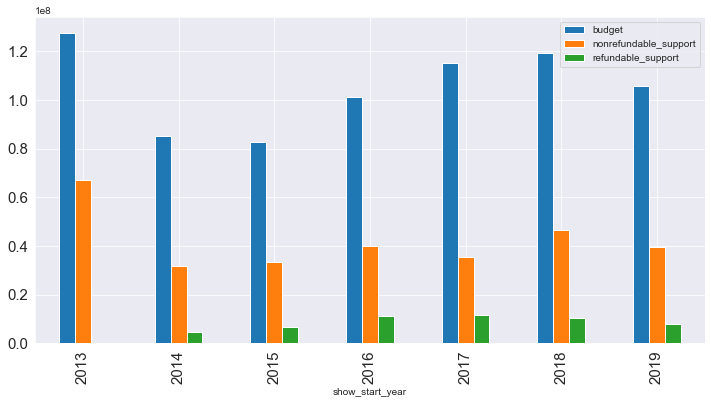

In [38]:
(gov_support_films
 .pivot_table
    (
     values=['refundable_support','nonrefundable_support','budget'],
     index='show_start_year',
     aggfunc='mean'
    )
 .plot(kind='bar', figsize=(12, 6), fontsize=15)
 );

На гистограмме показано, что в 2013 году было выделено больше всего денег государственной поддержки, при этом она была невозвратной. Можно предположить, что в 2014 году был пилотный запуск программы государственной поддержки кино. После этого были проанализированы полученные данные и дальше государственная поддержка развивалась постепенно, добавилась возвратная часть. Можем видеть плавный рост объема выделенных средств с 2014 по 2017 год, далее 2018-2019 года с небольшим увеличением объема финансирования.
Основная часть государственного финансирования - невозвратные средства, при этом постепенно увеличиваясь закладывается и возвратная часть (около одной четверти невозвратного финансирования).
Не считая 2013 года, где доля господдержки была около 55%, в среднем финансируется 30-50% затрат на производство картины.

Проверим, сколько фильмов с господдержкой выпускали в разные года:

,budget
show_start_year,
2013,2
2014,15
2015,77
2016,54
2017,33
2018,51
2019,62


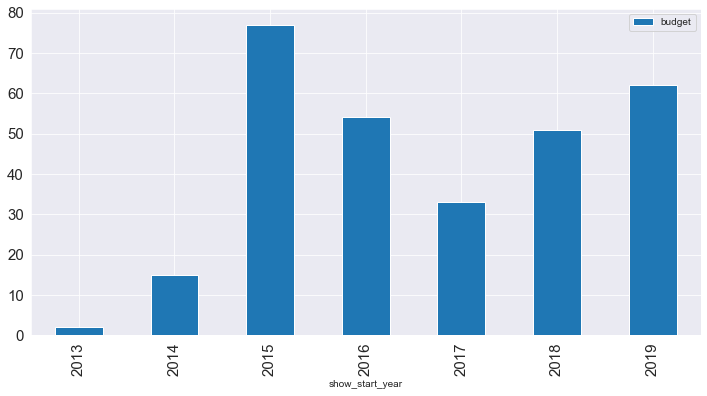

In [39]:
i = gov_support_films.pivot_table(
    values=['budget'],
    index='show_start_year',
    aggfunc='count'
    )
display(i)
i.plot(kind='bar', figsize=(12, 6), fontsize=15);



Из графика и сводной таблицы видим, что в 2013 было всего 2 профинансированных государством фильма.
В 2014 программа поддержки сработала еще на 15 картинах.
С 2015 года программу запустили на полную мощность, появилось значительное количество картин с господдержкой, больше всего в 2015 и 2019х годах.

Проверим, как хорошо окупаются такие фильмы


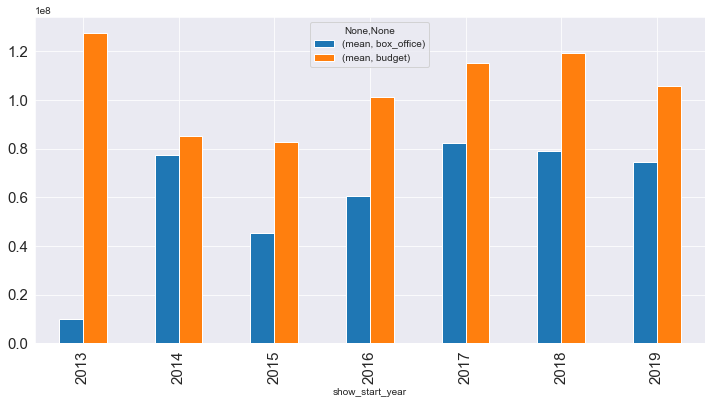

In [40]:
(gov_support_films
 .pivot_table
    (
    values=['budget','box_office'],
    index='show_start_year',
    aggfunc=['mean']
    )
.plot(kind='bar', figsize=(12, 6), fontsize=15)
);

Анализируя график и сводную таблицу можем наблюдать, что в среднем, фильмы с государственной поддержкой окупаются редко, так, в среднем кассовые сборы были меньше, чем бюджет фильма.

Проанализируем рейтинг фильмов с господдержкой

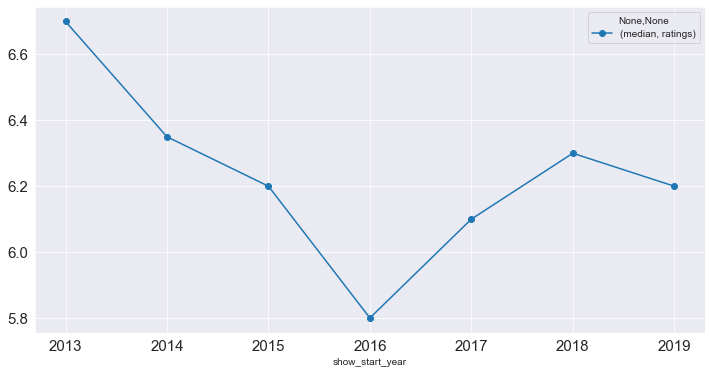

In [41]:
(gov_support_films
 .pivot_table
     (
     values=['ratings'],
     index='show_start_year',
     aggfunc=['median']
 )
 .plot(style=('o-'), figsize=(12, 6), fontsize=15)
 );

In [42]:
gov_support_films['ratings'].median()

6.2

Медианный рейтинг фильмов с государственной поддержкой достаточно хороший, около 6.2 из 10, но при этом нельзя его назвать высоким, на графике видим падение пользовательских оценок к 2016 году, далее качество фильмов, по субъективным оценкам начало повышаться.

Text(0.5, 1.0, 'Correlation heatmap')

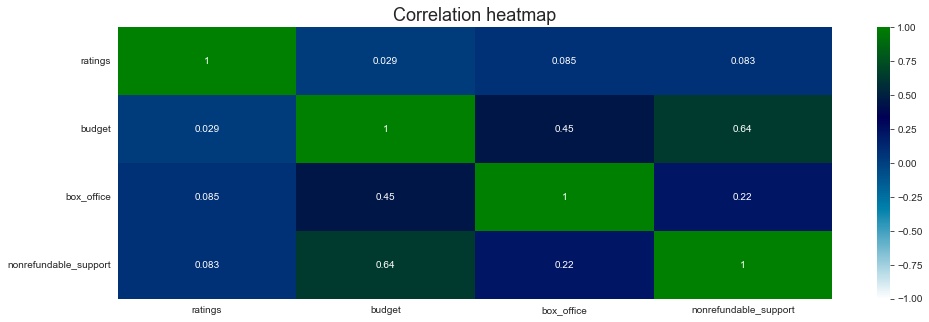

In [43]:
corr_columns = ['ratings', 'budget', 'box_office', 'nonrefundable_support']
plt.figure(figsize = (16,5))
seaborn.heatmap(gov_support_films[corr_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='ocean_r').set_title('Correlation heatmap', fontdict={'fontsize':18})

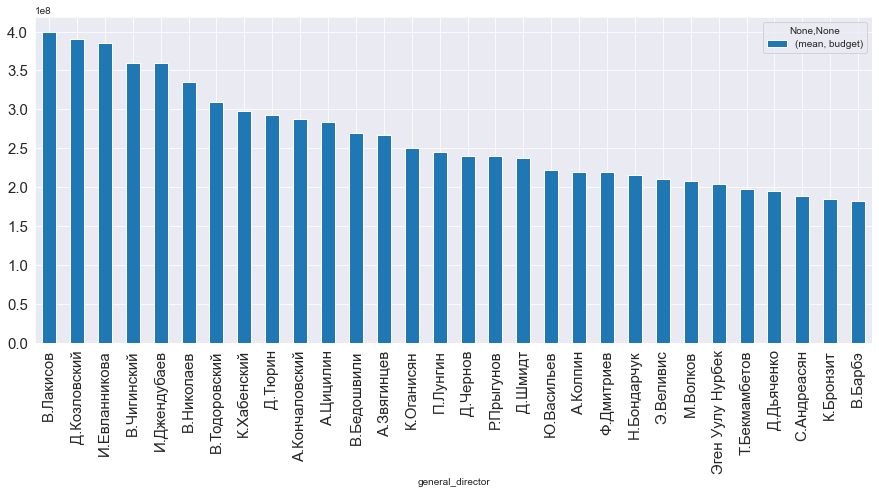

In [44]:
(gov_support_films
 .pivot_table
     (
     values=['budget'],
     index='general_director',
     aggfunc=['mean']
 )
 .sort_values(by=('mean','budget'), ascending=False)
 .head(30)
 .plot(kind='bar', figsize=(15, 6), fontsize=15)
 );

Получили топ-30 режиссеров, по бюджету среди фильмовс государственной поддержкой

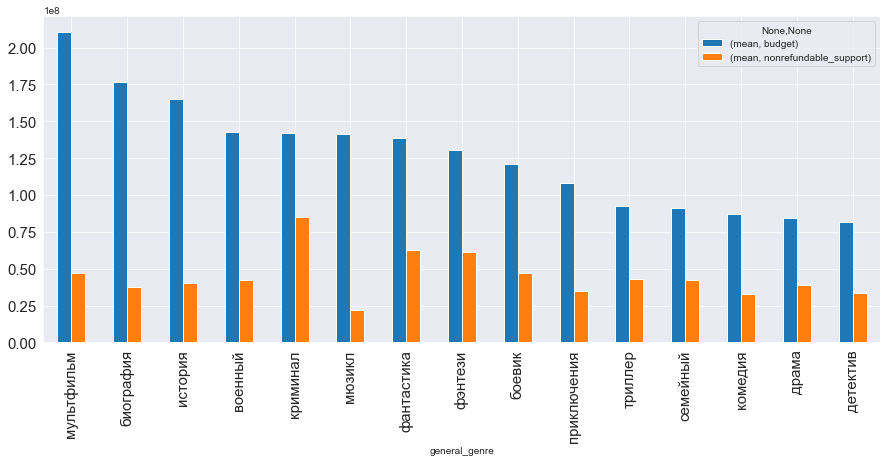

In [45]:
(gov_support_films
 .pivot_table
     (
     values=['budget', 'nonrefundable_support'],
     index='general_genre',
     aggfunc=['mean']
 )
 .sort_values(by=('mean','budget'), ascending=False)
 .head(15)
 .plot(kind='bar', figsize=(15, 6), fontsize=15)
 );

Исходя из графика выше, можно понять, что самые большие затраты забирают на себя мультфильмы, далее идут биографические фильмы, а также исторические и военные. Как правило, фильмы с господдержкой выпускаются именно в этих жанрах. Удивительно, что большая часть господдержки идет на фильмы в жанре "криминал".

### Напишите общий вывод


#### В ходе исследования были проведены:
 - Объединение двух датасетов в один, для анализа полученных данных;
 - Преобразованы типы данных, устранены пропуски там, где это необходимо;
 - Проверены дубликаты, устранены проблемы в категориальных и количественных данных;
 - Добавлены необходимые столбцы в объединенный датасет;
 - В ходе исследовательского анализа были сделаны выводы, что полнее всего в данных представлены 2018 и 2019 года, а в 2018 году сумма сборов была максимальной (почти 50 млн рублей);
 - Самые успешные в прокате фильмы имеют возрастное ограничение 12+ или 16+;
 - Также был исследован сегмент фильмов с государственной поддержкой, были определены периоды, когда государственная поддержка была большой, какого типа была поддержка (возвратной или невозвратной), определен рейтинг фильмов с господдержкой.

При исследовании фильмов с господдержкой были выявлены следующие факты: 
 - Рейтинг фильмов до 2016 года стремительно падал, сейчас доверие людей к фильмам с государственной поддержкой возвращается, растут рейтинги, повышается качество фильмов;
 - На данный момент, используя полученные данные, можно сделать вывод, что почти все фильмы с господдержкой убыточны, при этом хаотичность размеров убытков год от года уменьшается, что говорит о положительной динамике и лучшем планировании при кинопроизводстве;
 - Бюджет фильмов с 2017 года растет плавно, без всплесков, это свидетельствует о правильном направлении планирования бюджетов; 
